<a href="https://colab.research.google.com/github/habib-N19/AI-ML-Assignment3/blob/main/AI_ML_Assignment_3_Module_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 AI/ML Assignment 3
## Supervised Learning Models in Practice

**Total Marks: 100**  
**Submission Format:** Single Jupyter Notebook (`.ipynb`)

---
## 📌 General Instructions (Read Carefully)

- This assignment covers **Modules 13–18**.
- Use **Python and scikit-learn only**.
- Do NOT use AutoML, deep learning, or external ML libraries.
- Fix `random_state=42` wherever applicable.
- Plots must be labeled and readable.
- Do not delete or rename cells.

***Classification Dataset:*** https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data

***Regresssion Dataset:*** https://www.kaggle.com/datasets/mirichoi0218/insurance

## 🔧 TODO 0: Environment Setup (5 Marks)
**Marks Breakdown:**
- Correct imports (3)
- Clean setup, no unused imports (2)


In [176]:
# TODO: Import all necessary libraries here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# 🔵 PART A: Regression Task (45 Marks)
You will work with the provided **regression dataset**.


## TODO A1: Dataset Loading and Understanding (5 Marks)
**You must:**
- Load the dataset
- Show shape and column names
- Identify target variable

**Marks:** Data loading (2), Explanation (3)


In [177]:
# TODO: Load regression dataset
df1 = pd.read_csv('insurance.csv')
print(df1.shape)
print(df1.columns)
df1.head()

(1338, 7)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Identify target variable:
Here, the target variable to work with is charges. We want to predict the cost of insurance based on demographic and other key features.

## TODO A2: Exploratory Data Analysis (EDA) (5 Marks)
**You must:**
- Show descriptive statistics
- Plot correlation heatmap
- Plot at least one feature vs target

**Marks:** Plots (3), Interpretation (2)


In [178]:
# TODO: Perform EDA
df1.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


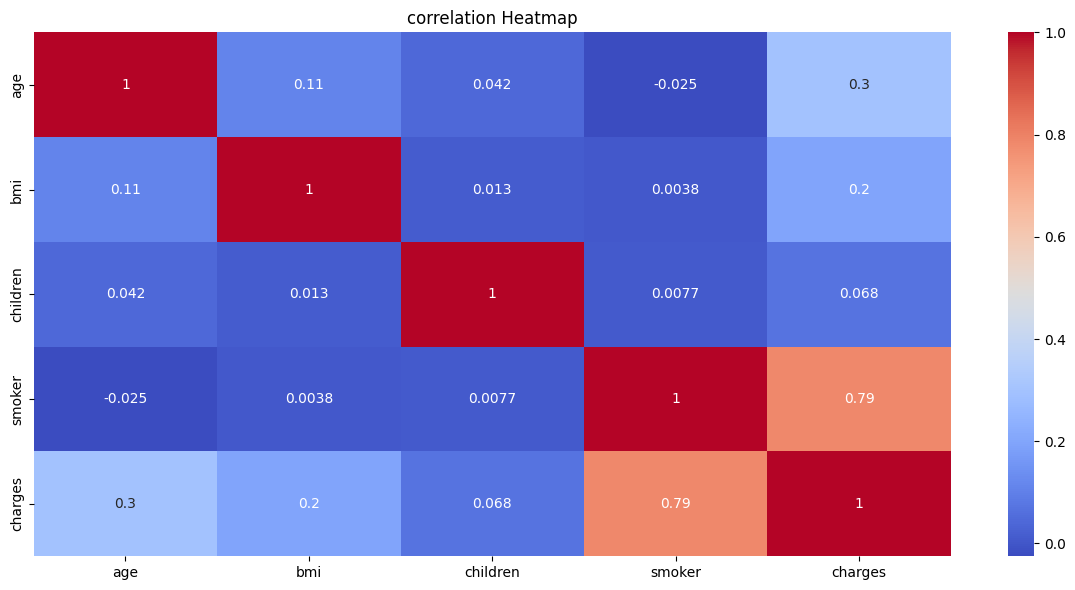

In [179]:
#correlation heatmap
plt.figure(figsize=(12,6))
df_corr = df1.copy()
lblenc= LabelEncoder()
df_corr["smoker"] = lblenc.fit_transform(df_corr["smoker"])
corr=df_corr.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("correlation Heatmap")
plt.tight_layout()
plt.show()

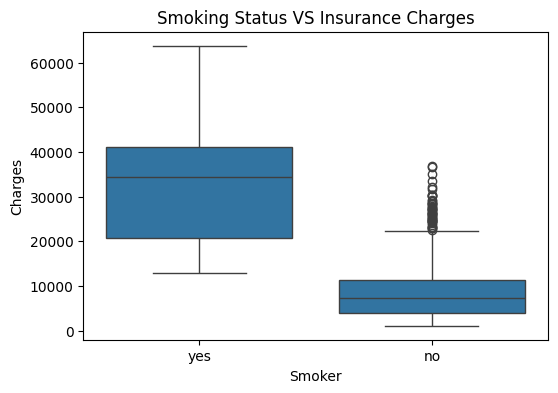

In [180]:
#feature vs target plots
plt.figure(figsize=(6,4))
sns.boxplot(x="smoker", y="charges", data=df1)
plt.title('Smoking Status VS Insurance Charges')
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

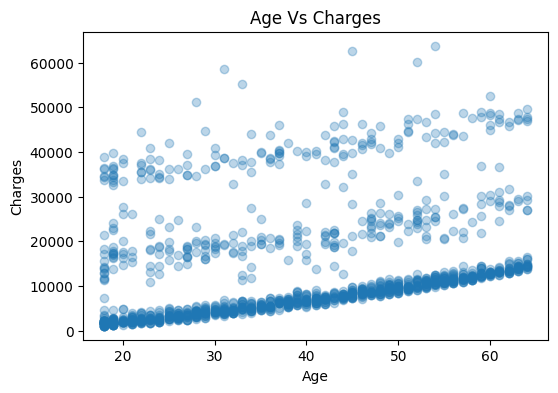

In [181]:
# feature vs target (Age vs charges)
plt.figure(figsize=(6,4))
plt.scatter(df1["age"]  , df1["charges"], alpha=0.3)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Age Vs Charges")
plt.show()

##Interpretation
From these plots we can clearly see insurance charges vary across the board. Among them smoking status has the highest relationship with insurance charge. Age, BMI shows moderate positive relationships with charges and the no of children covered by health insurance has minimal relation with the charges.

## TODO A3: Feature Preparation (5 Marks)
**You must:**
- Train-test split
- Scaling (if applicable)

**Marks:** Correct split (3), Explanation (2)


In [182]:
# TODO: Prepare features
target_col="charges"
X = df1.drop(columns=target_col)
y = df1[target_col]
lblenc = LabelEncoder()
X["sex"] = lblenc.fit_transform(X["sex"])
X["smoker"] = lblenc.fit_transform(X["smoker"])
X = pd.get_dummies(
    X, columns = ["region"], drop_first=True
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##Explanation
here, we first seperated the target variable column. Then we had to encode the non numeric data because machine can only learn / use numeric data. For that we used go to label encoding for binary data and as for region we used one hot encoding to make it non biased and numeric. Splitted the test data into 80/20. and also we scalded the data after split using standard scaler.

## TODO A4: Multiple Linear Regression (8 Marks)
**You must:**
- Train model
- Evaluate using RMSE, MAE, R²

**Marks:** Model (4), Metrics (4)


In [183]:
# TODO: Multiple Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
print("Model fitted successfully")
y_train_pred = lin_reg.predict(X_train_scaled)
y_test_pred = lin_reg.predict(X_test_scaled)


#evaluate train data
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

#evaulating test data
mae_test=mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test=r2_score(y_test, y_test_pred)



print("Train MAE", mae_train)
print("Train RMSE", rmse_train)
print("Train R2", r2_train)

#test
print()
print("Test MAE", mae_test)
print("Test RMSE", rmse_test)
print("Test R2", r2_test)


Model fitted successfully
Train MAE 4208.234572492225
Train RMSE 6105.545160099847
Train R2 0.7417255854683333

Test MAE 4181.1944737536505
Test RMSE 5796.284659276274
Test R2 0.7835929767120722


## TODO A5: Polynomial Regression (7 Marks)
**You must:**
- Apply polynomial features
- Compare with linear regression

**Marks:** Implementation (4), Comparison (3)


In [184]:
# TODO: Polynomial Regression
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias = False)),
    ('lin_reg', LinearRegression())

])
poly_pipeline.fit(X_train_scaled, y_train)
y_test_poly_pred = poly_pipeline.predict(X_test_scaled)
y_train_poly_pred = poly_pipeline.predict(X_train_scaled)

mae_poly = mean_absolute_error(y_test, y_test_poly_pred)
rmse_poly=np.sqrt(mean_squared_error(y_test, y_test_poly_pred))
r2_poly = r2_score(y_test, y_test_poly_pred)

print("Polynomial MAE:", mae_poly)
print("Polynomial RMSE:", rmse_poly)
print("Polynomial R2:", r2_poly)

print()
print("Linear Regression RMSE:", rmse_test)
print("Polynomial Regression RMSE:", rmse_poly)

print("Linear Regression R2:", r2_test)
print("Polynomial Regression R2:", r2_poly)

Polynomial MAE: 2729.5001336394516
Polynomial RMSE: 4551.132385233193
Polynomial R2: 0.866583090316484

Linear Regression RMSE: 5796.284659276274
Polynomial Regression RMSE: 4551.132385233193
Linear Regression R2: 0.7835929767120722
Polynomial Regression R2: 0.866583090316484


##Compare with linear regression
We can clearly see that the polynomial regression model outperforms the multiple linear regression model on the test dataset. It achieves a lower RMSE and a higher R² score. This indicates that polynomial regression captures the non-linear relationship between the predictors and insurance charges more effectively.

## TODO A6: Support Vector Regression (7 Marks)
**You must:**
- Train SVR (RBF kernel)
- Evaluate performance
- Justify kernel choice

**Marks:** Model (4), Justification (3)


In [185]:
# TODO: Support Vector Regression

svr = SVR(kernel='rbf', C=100.0, epsilon=0.5, gamma = 'scale')

svr.fit(X_train_scaled, y_train)

y_test_svr_pred = svr.predict(X_test_scaled)
y_train_svr_pred = svr.predict(X_train_scaled)

mae_svr= mean_absolute_error(y_test, y_test_svr_pred)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_test_svr_pred))
r2_svr = r2_score(y_test, y_test_svr_pred)

print("SVR MAE:", mae_svr)
print("SVR RMSE:", rmse_svr)
print("SVR R2:", r2_svr)

print()
print("Train R2:", r2_score(y_train, y_train_svr_pred))
print("Test R2:", r2_svr)




SVR MAE: 5868.871123930224
SVR RMSE: 10823.993800895576
SVR R2: 0.24534750992130328

Train R2: 0.21141387060856187
Test R2: 0.24534750992130328


##Evaluate performance
The RBF SVR achieved lower performance compared to linear regression. We can see with a lower R2 scrore and higher error values on the test set.
##Justify kernel choice
Basically RBF kernel is a go to kernel for modeling non linear relationships between features and the target variable. Our insurance dataset looks promising for the features init. However due to limited dataset size and relatively linear structure, rbf kernel did not outperform linear kernel.

## TODO A7: Random Forest Regressor (8 Marks)
**You must:**
- Train Random Forest
- Evaluate model

**Marks:** Model (4), Evaluation (4)


In [186]:
# TODO: Random Forest Regressor
rf_reg= RandomForestRegressor(
    n_estimators = 100,
    random_state = 42
)
rf_reg.fit(X_train, y_train)
# evaluation

y_test_rf_pred = rf_reg.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_test_poly_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_rf_pred))
r2_rf = r2_score(y_test, y_test_rf_pred)

print("RF MAE:", mae_rf)
print("RF RMSE:", rmse_rf)
print("RF R2:", r2_rf)

# Random forrest regresssor showing strong performance with
# high R2 and relatively low rmse score.

RF MAE: 2729.5001336394516
RF RMSE: 4577.738987730898
RF R2: 0.8650185799366616


# 🟠 PART B: Classification Task (45 Marks)
You will work with the provided **classification dataset**.


## TODO B1: Dataset Understanding (5 Marks)
**You must:**
- Load dataset
- Show class distribution
- Comment on imbalance

**Marks:** Analysis (3), Explanation (2)


In [188]:
# TODO: Load classification dataset

df2 = pd.read_csv("loan_data.csv")
print(df2.shape)
print(df2.columns)
df2.head(10)

(45000, 14)
Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


loan_status
0    35000
1    10000
Name: count, dtype: int64


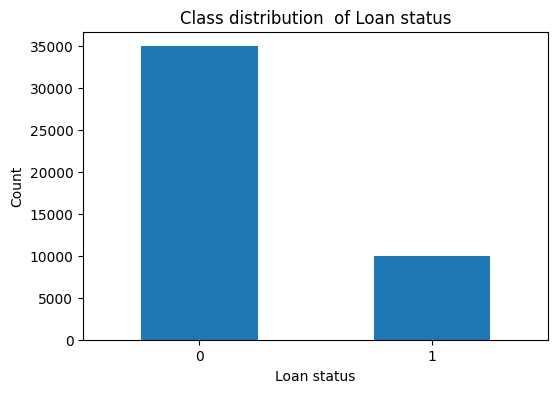

In [189]:
#show class distribution
class_counts = df2['loan_status'].value_counts()
print(class_counts)

plt.figure(figsize=(6,4))
class_counts.plot(kind='bar')

plt.xticks(rotation=0)
plt.xlabel('Loan status')
plt.ylabel('Count')
plt.title('Class distribution  of Loan status')
plt.show()

# comment on imbalance

Here from the class distribution we can see the approval rejection is way higher than approved loan status. This imbalance can bias models to predict the majority class. We need to take precaution when we train the model with this dataset.

## TODO B2: Exploratory Data Analysis (5 Marks)
**You must:**
- Plot class counts
- Plot at least one feature vs class

**Marks:** Plots (5),


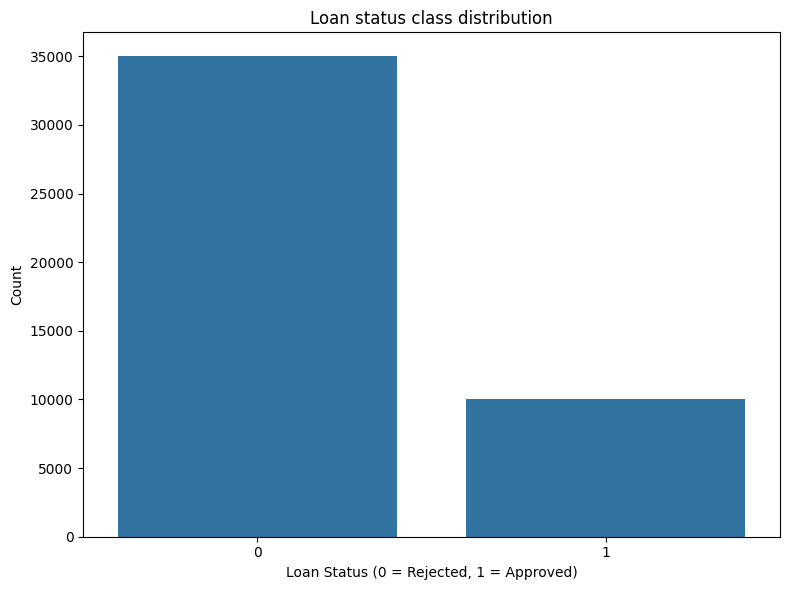

In [191]:
# TODO: Classification EDA
plt.figure(figsize=(8,6))
sns.countplot(x='loan_status', data=df2)
plt.title('Loan status class distribution')
plt.xlabel('Loan Status (0 = Rejected, 1 = Approved)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

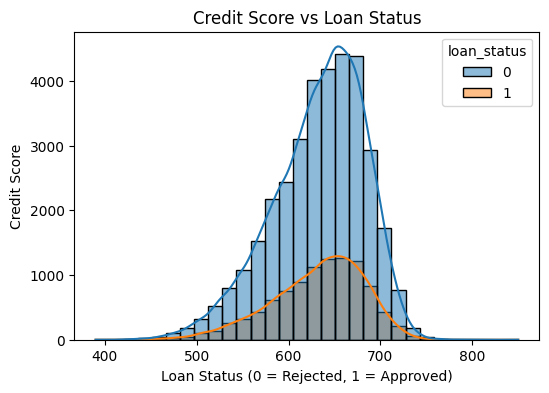

In [192]:
#feature vs class plot
plt.figure(figsize=(6,4))
sns.histplot(x='credit_score', hue='loan_status', bins=30, kde=True, data=df2)
plt.title("Credit Score vs Loan Status")
plt.xlabel("Loan Status (0 = Rejected, 1 = Approved)")
plt.ylabel("Credit Score")
plt.show()

## TODO B3: Feature Preparation (5 Marks)
**You must:**
- Encoding (if needed)
- Scaling
- Train-test split with stratification




In [193]:
# TODO: Prepare classification features

cat_cols  = [
    'person_gender',
    'person_education',
    'person_home_ownership',
    'loan_intent',
    'previous_loan_defaults_on_file'
]
target_col='loan_status'

X_clf = df2.drop(columns=target_col)
y_clf = df2[target_col]
#ohe
X_clf_encoded = pd.get_dummies(X_clf, columns= cat_cols, drop_first=True)

#scaling
X_clf_scaled = scaler.fit_transform(X_clf_encoded)
X_clf_train, X_clf_test,y_clf_train, y_clf_test = train_test_split(
    X_clf_scaled,
    y_clf,
    test_size=0.2,
    random_state=42,
    stratify=y_clf
)


## TODO B4: Logistic Regression with L2 (8 Marks)
**You must:**
- Train Logistic Regression
- Evaluate using Accuracy, Precision, Recall
- Show Confusion Matrix

**Marks:** Model (4), Metrics (4)


In [194]:
# TODO: Logistic Regression
log_reg = LogisticRegression(
 max_iter=100,
 random_state=42
)
log_reg.fit(X_clf_train, y_clf_train)
y_clf_pred = log_reg.predict(X_clf_test)

In [195]:
#evaluation
acc = accuracy_score(y_clf_test, y_clf_pred)
prec = precision_score(y_clf_test,  y_clf_pred)
rec= recall_score(y_clf_test, y_clf_pred)
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)

Accuracy: 0.8997777777777778
Precision: 0.7895569620253164
Recall: 0.7485


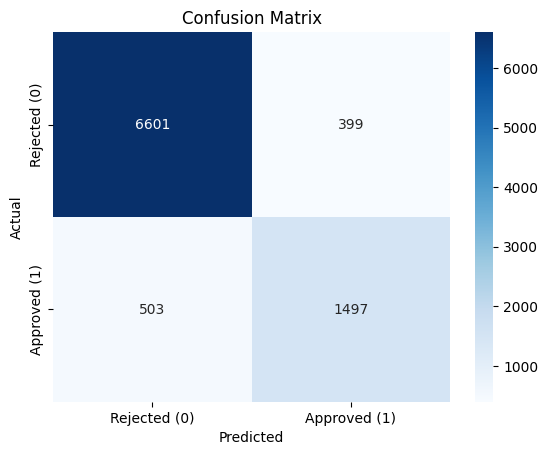

In [196]:
#confusion matrix
cm = confusion_matrix(y_clf_test, y_clf_pred )
sns.heatmap(
    cm,
    cmap='Blues',
    fmt='d',
    annot=True,
    xticklabels=['Rejected (0)', 'Approved (1)'],
    yticklabels=['Rejected (0)', 'Approved (1)']
          )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## TODO B5: Support Vector Machine (7 Marks)
**You must:**
- Train SVM (Linear or RBF)
- Evaluate

**Marks:** Model (4), Evaluation (3)


SVM Accuracy: 0.9004444444444445
SVM Precision: 0.7939297124600639
SVM Recall: 0.7455


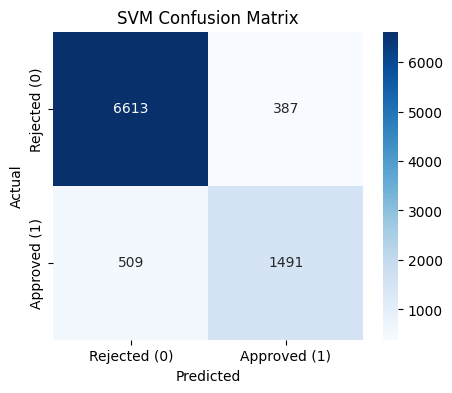

In [200]:
# TODO: SVM Classification
svm_clf = SVC(kernel='linear' ,random_state=42,)
svm_clf.fit(X_clf_train, y_clf_train)
y_clf_pred = svm_clf.predict(X_clf_test)
#evaluate
acc = accuracy_score(y_clf_test, y_clf_pred)
prec = precision_score(y_clf_test, y_clf_pred)
rec = recall_score(y_clf_test, y_clf_pred)

print("SVM Accuracy:", acc)
print("SVM Precision:", prec)
print("SVM Recall:", rec)


cm = confusion_matrix(y_clf_test, y_clf_pred)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Rejected (0)', 'Approved (1)'],
    yticklabels=['Rejected (0)', 'Approved (1)']
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()


## TODO B6: Naive Bayes (5 Marks)
**You must:**
- Choose correct NB variant



In [199]:
# TODO: Naive Bayes
nb_clf= GaussianNB()
nb_clf.fit(X_clf_train, y_clf_train)
y_clf_pred = nb_clf.predict(X_clf_test)
print("Accuracy:", accuracy_score(y_clf_test, y_clf_pred))
print("Precision:", precision_score(y_clf_test, y_clf_pred))
print("Recall:", recall_score(y_clf_test, y_clf_pred))


Accuracy: 0.753
Precision: 0.47310012062726176
Recall: 0.9805


## TODO B7: K-Nearest Neighbors (5 Marks)
**You must:**
- Try multiple K values
- Plot accuracy vs K

**Marks:** Experiment (3), Plot & choice (2)


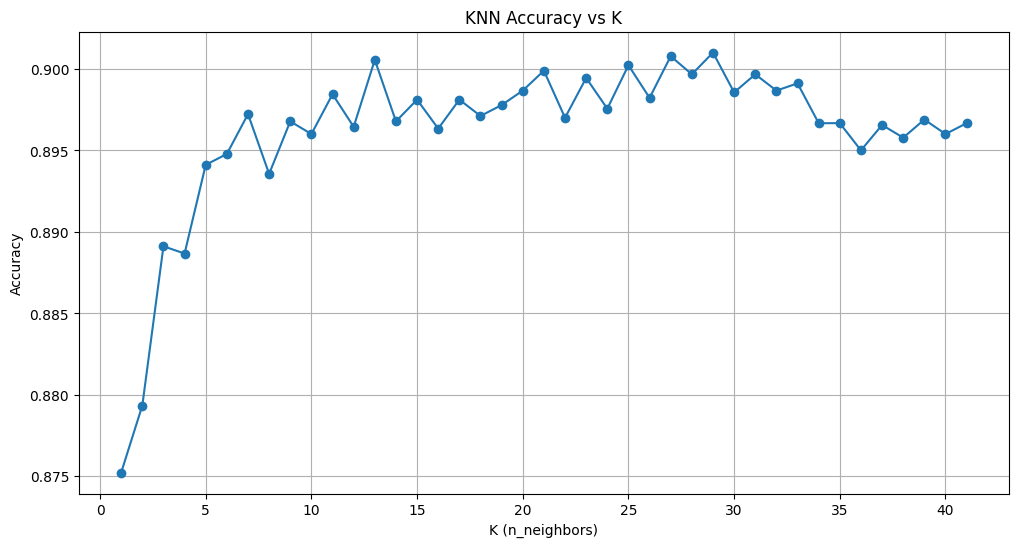

Best K: 29
Best accuracy: 0.901


In [204]:
# TODO: KNN
k_values = range(1,42)
accs = []
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_clf_train, y_clf_train)
  pred=knn.predict(X_clf_test)
  accs.append(accuracy_score(y_clf_test, pred))
plt.figure(figsize=(12,6))
plt.plot(k_values, accs, marker='o')
plt.xlabel("K (n_neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K")
plt.grid(True)
plt.show()



best_k = list(k_values)[int(np.argmax(accs))]
print("Best K:", best_k)
print("Best accuracy:", float(np.max(accs)))

## TODO B8: Random Forest Classifier (5 Marks)
**You must:**
- Train model
- Show feature importance

**Marks:** Model (3), Interpretation (2)


In [206]:
# TODO: Random Forest Classifier
rf_clf = RandomForestClassifier(
    n_estimators = 100,
    random_state= 42,

)

rf_clf.fit(X_clf_train, y_clf_train)
y_clf_pred = rf_clf.predict(X_clf_test)

acc = accuracy_score(y_clf_test, y_clf_pred)
prec = precision_score(y_clf_test, y_clf_pred)
rec = recall_score(y_clf_test, y_clf_pred)

print("RF Accuracy:", acc)
print("RF Precision:", prec)
print("RF Recall:", rec)


importances = rf_clf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_clf_encoded.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
feature_importance_df.head(10)


RF Accuracy: 0.9291111111111111
RF Precision: 0.8968531468531469
RF Recall: 0.7695


,Feature,Importance
21,previous_loan_defaults_on_file_Yes,0.218127
5,loan_percent_income,0.163793
4,loan_int_rate,0.157401
1,person_income,0.124549
3,loan_amnt,0.061482
15,person_home_ownership_RENT,0.056364
7,credit_score,0.054492
0,person_age,0.031961
2,person_emp_exp,0.028429
6,cb_person_cred_hist_length,0.026421



# 🧠 Final Reflection (5 Marks)
**Answer briefly:**
- Best regression model and why
Polynomial Regression model, it achieved the highest R2, and lowest rmse.
- Best classification model and why
Random forrest Classifier, it showed highest accuracy and precision with balance recall
- One real-world deployment scenario
The models can be deployed for predicting loan approval or price prediction in financial systems.


## TODO: Write your reflection here